# **Overview**

### **Scenario**

A fast-food chain is introducing a new menu item but is unsure which of three proposed marketing campaigns will maximize its sales. To determine the most effective strategy, the chain has conducted an experiment. Each campaign (Promotion 1, Promotion 2, and Promotion 3) was tested in randomly selected locations across various markets for four weeks. Weekly sales data for the new item was collected during this period.

The **current average weekly sales** for newly launched products is **\$50,000 per location**. The marketing team has set a goal to increase sales by at least **\$4,000 per week per location**. Therefore, any promotion that raises the average weekly sales to **\$54,000 or more** will be considered a success. The experiment aims to identify which, if any, of the campaigns meets or exceeds this benchmark and determines which campaign performs best overall.

---

### **Columns Description**
- **MarketID**: Identifies the market where the location is situated. Useful for analyzing the impact of promotions across different market areas and controlling for regional effects.
- **MarketSize**: Indicates the sales potential of the market (e.g., small, medium, large). Important for understanding whether market size affects the success of a promotion.
- **LocationID**: A unique identifier for each store location. Helps in tracking and comparing sales performance across locations.
- **AgeOfStore**: The number of years since the store opened. This helps determine if newer or older stores respond differently to promotions.
- **Promotion**: Specifies which of the three promotions (1, 2, or 3) was applied at a location. This is the **independent variable** for the A/B test.
- **week**: The week number (1–4) during the testing period. Helps evaluate whether the promotion's impact increases, decreases, or remains consistent over time.
- **SalesInThousands**: Weekly sales amount (in thousands of dollars) for each location under the assigned promotion. This is the **dependent variable** and the primary metric to evaluate the success of each promotion.

---

### **Goal**
The goal is to analyze the weekly sales data to evaluate the performance of the three promotional strategies. Using A/B testing techniques, you will determine:
1. Which promotion, if any, significantly increases weekly sales to the target of **$54,000 or more per location**.
2. Whether there are statistically significant differences in the effectiveness of the three campaigns.
3. The marketing campaign that works best for maximizing sales of the new menu item.

# **Import Required Libraries and Data Load**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings('ignore')


# Displaying all columns in DataFrames (useful for Jupyter)
pd.set_option("display.max_columns", None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/A B Test/WA_Marketing-Campaign.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


# **Data Preprocessing**

In [ ]:
df.shape

(548, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


**There are 548 instances with 7 columns in the dataset. There is no null values. It is good to convert some columns ('MarketID', 'LocationID', 'Promotion', 'week') to cotegorical.**

In [ ]:
df.duplicated().sum()

0

**There is no duplicate rows in the dataset**

In [ ]:
df.columns

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')

**'MarketID', 'LocationID', 'Promotion', 'week' Columns need to be converted to Categorical**

In [ ]:
cat_cols = ['MarketID', 'LocationID', 'Promotion', 'week']

for column in cat_cols:
  df[column] = df[column].astype('category')

df.dtypes

,0
MarketID,category
MarketSize,object
LocationID,category
AgeOfStore,int64
Promotion,category
week,category
SalesInThousands,float64


# **Exploratory Data Analysis (EDA)**

In [ ]:
df.describe().round(2)

,AgeOfStore,SalesInThousands
count,548.00,548.00
mean,8.50,53.47
std,6.64,16.76
min,1.00,17.34
25%,4.00,42.54
50%,7.00,50.20
75%,12.00,60.48
max,28.00,99.65


**Summary Statistics:**

The dataset contains **548 observations** for both the **age of the stores** and their **weekly sales in thousands**. The **average age** of the stores is **8.5 years**, with a **standard deviation** of **6.64 years**, ranging from **1 to 28 years**. **Sales in thousands** have an **average** of **53.47**, with a **standard deviation** of **16.76**, indicating **moderate variability** in sales performance. The **minimum sales** recorded are **17.34**, while the **maximum** is **99.65**. The **median** (**50th percentile**) sales value is **50.20**, suggesting that half of the stores achieve weekly sales below this value. The **interquartile range** for sales (**42.54 to 60.48**) reveals that most stores fall within this range, indicating a concentration of sales near the mean. These statistics suggest that while there is **variability** in both **store age** and **sales**, most stores achieve sales within a **relatively stable range**, with a few **outliers** reaching the extremes.

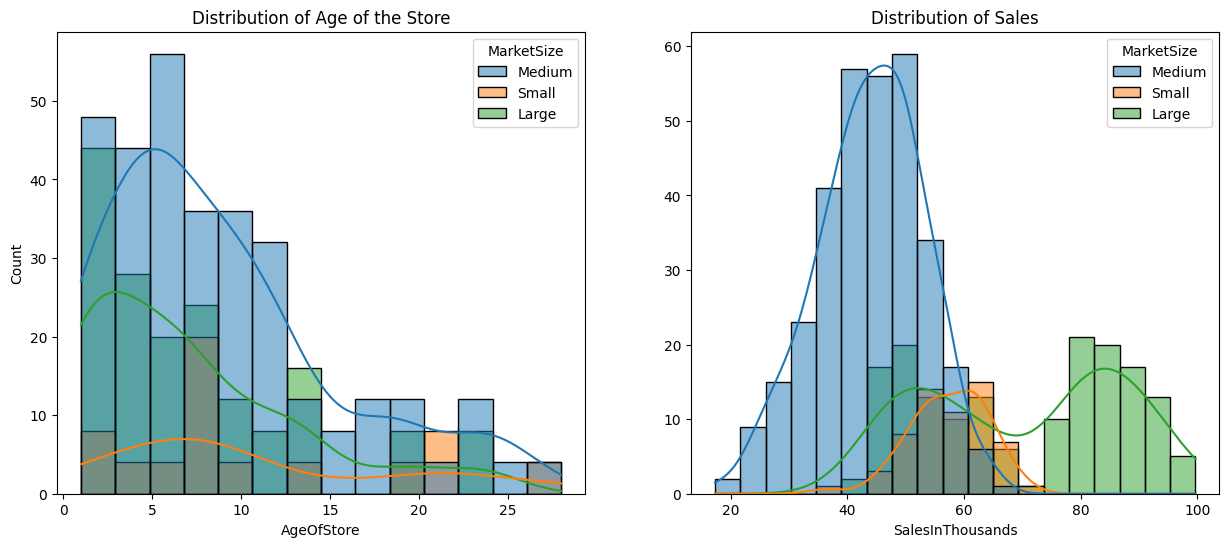

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

sns.histplot(data = df, x = 'AgeOfStore', hue = 'MarketSize', kde = True, ax = ax[0])
ax[0].set_title("Distribution of Age of the Store")

sns.histplot(data = df, x = 'SalesInThousands', hue = 'MarketSize', kde = True, ax = ax[1])
ax[1].set_title("Distribution of Sales")
ax[1].set_ylabel('')

plt.show()

**Distribution:**

The histograms with **KDE plots** illustrate the **distributions of Age of the Store** and **Sales in Thousands**, segmented by **MarketSize** (Small, Medium, Large). For the **Age of the Store**, most stores fall within the **younger age range (0-10 years)**, especially in **Medium-sized markets**, while **Large markets** have a slightly higher representation in older stores. For **Sales**, **Medium markets** dominate with sales concentrated around **40 to 60 thousand**, reflecting a **normal-like distribution**. **Small markets** have a lower sales range, mostly between **30 and 50 thousand**, whereas **Large markets** show a bimodal distribution with sales peaks at both **40-50 thousand** and **80-90 thousand**, indicating **variability in performance**. The **KDE curves** highlight the differences in distribution shapes, emphasizing that **market size** significantly impacts both **store age** and **sales performance**. These trends suggest that **Medium markets** have consistent performance, while **Large markets** exhibit **greater sales diversity**.

## **Sales Analysis**

In [ ]:
avg_sales_per_location = df.groupby('LocationID')['SalesInThousands'].mean().reset_index()
avg_sales_per_location.rename(columns={"SalesInThousands": "AvgWeeklySales"}, inplace=True)
print(avg_sales_per_location)

    LocationID  AvgWeeklySales
0            1         34.4200
1            2         29.5450
2            3         40.6800
3            4         33.7075
4            5         29.0025
..         ...             ...
132        916         47.7600
133        917         52.9675
134        918         55.9750
135        919         61.1000
136        920         47.4125

[137 rows x 2 columns]


In [ ]:
avg_sales_per_location.describe().round(2)

,AvgWeeklySales
count,137.00
mean,53.47
std,16.19
min,27.84
25%,43.24
50%,49.72
75%,59.04
max,95.09


In [ ]:
avg_sales_per_location['AvgWeeklySales'].mean()

53.46620437956204

**Average Weekly Sales per Location:**

The summary statistics of **average weekly sales per location** reveal that the **mean sales** are **53.47 thousand**, with a **standard deviation** of **16.19 thousand**, indicating moderate variability across locations. The **minimum sales** recorded are **27.84 thousand**, while the **maximum** is **95.09 thousand**, showing a wide range. The **median sales** value is **49.72 thousand**, with the **25th and 75th percentiles** at **43.24 thousand** and **59.04 thousand**, respectively, suggesting that most locations have sales concentrated around these values.

In [ ]:
avg_sales_per_week = df.groupby('week')['SalesInThousands'].mean().reset_index()
avg_sales_per_week.rename(columns={"SalesInThousands": "AvgWeeklySales"}, inplace=True)
avg_sales_per_week

,week,AvgWeeklySales
0,1,53.790584
1,2,53.386569
2,3,53.474599
3,4,53.213066


**Average Weekly Sales Trend:**

The weekly **average sales trends** indicate consistency in **AvgWeeklySales** across the four weeks. Week 1 has the **highest average sales** at **53.79 thousand**, while Week 4 shows the **lowest average sales** at **53.21 thousand**. Weeks 2 and 3 have similar values of **53.39 thousand** and **53.47 thousand**, respectively, indicating minimal fluctuation. Overall, the sales are relatively stable, reflecting a well-maintained performance over time.

In [ ]:
avg_sales_per_promo = df.groupby('Promotion')['SalesInThousands'].mean().reset_index()
avg_sales_per_promo.rename(columns={"SalesInThousands": "AvgWeeklySales"}, inplace=True)
avg_sales_per_promo

,Promotion,AvgWeeklySales
0,1,58.099012
1,2,47.329415
2,3,55.364468


**Average Weekly Sales per Promotion:**

The **average weekly sales** vary significantly across the three promotions. **Promotion 1** achieves the **highest average sales** at **58.10 thousand**, indicating its strong effectiveness. In contrast, **Promotion 2** has the **lowest average sales** at **47.33 thousand**, suggesting it is the least effective. **Promotion 3** performs moderately with an average sales figure of **55.36 thousand**, showing better results than Promotion 2 but falling short of Promotion 1. These differences highlight a clear variation in the impact of the promotions.

# **A/B Test**

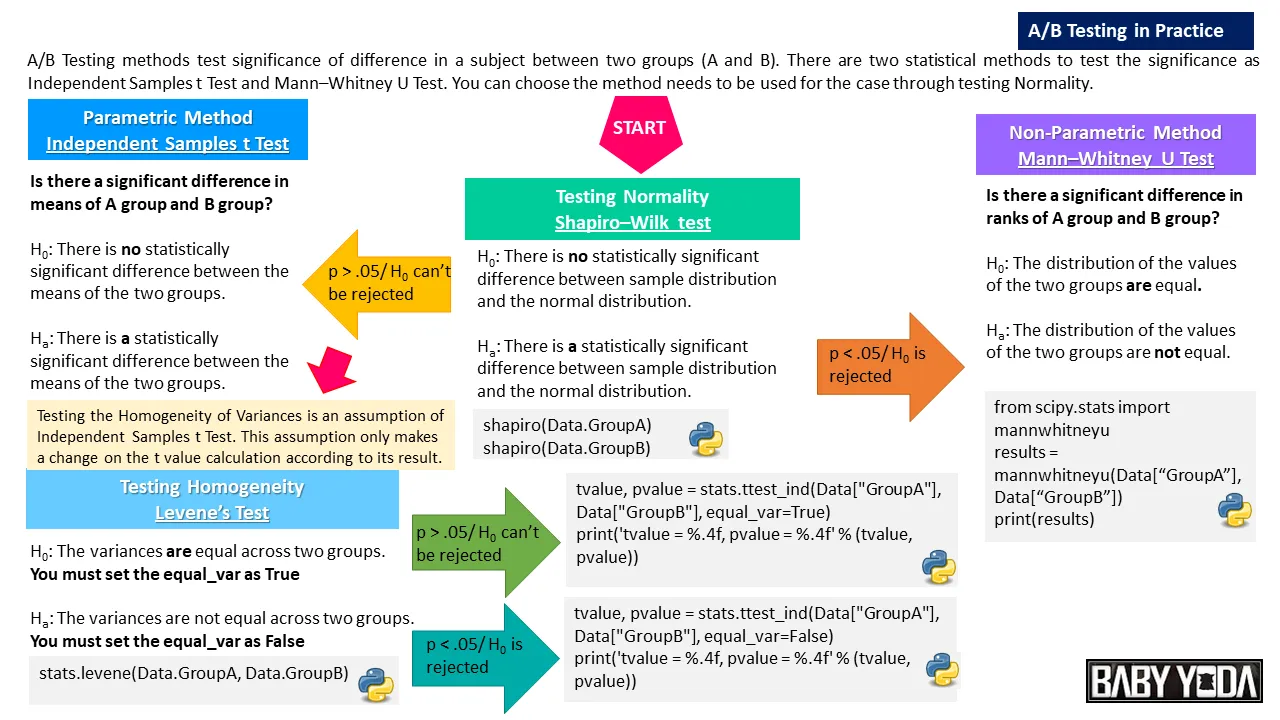

## **Setting up the Hypothesis**

### **Null and Alternative Hypothesis:**

1. **Null Hypothesis (\$H_{0}$\)**:  
   The average weekly sales for the three promotions are equal.  

2. **Alternative Hypothesis \($H_{a}$\)**:  
   At least one promotion has a different average weekly sales compared to the others.  
  

---

### **Explanation:**
The ANOVA test will compare the means of the three groups (Promotions 1, 2, and 3) to see if there are statistically significant differences between them. If the null hypothesis is rejected, it indicates that at least one promotion performs differently in terms of average weekly sales.

Once the ANOVA test is complete, if the results are significant, follow-up pairwise comparisons (e.g., Tukey’s HSD test) can be used to identify which promotions differ.

## **Choosing the variables**

**Purpose:**

Making the groups to prepare separate subsets of sales data for each promotion, which are typically used for further analysis, such as comparing sales performance across promotions or running statistical tests like the **Kruskal-Wallis test** or **Tukey's HSD test**.

In [ ]:
sales_promotion_1 = df[df['Promotion'] == 1]['SalesInThousands']
sales_promotion_2 = df[df['Promotion'] == 2]['SalesInThousands']
sales_promotion_3 = df[df['Promotion'] == 3]['SalesInThousands']

## **Choosing a sample size**

In [ ]:
np.mean(sales_promotion_1)

58.09901162790698

In [ ]:
np.std(sales_promotion_1, ddof=1)

16.553781697578724

In [ ]:
from math import ceil

In [ ]:
# Baseline sales
baseline = 50   # 50 Thousand

# Function to calculate Cohen's d
def cohens_d(data, baseline):
    mean_sales = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Sample standard deviation
    return (mean_sales - baseline) / std_dev

# Calculate Cohen's d for each campaign
effect_size_1 = cohens_d(sales_promotion_1, baseline)
effect_size_2 = cohens_d(sales_promotion_2, baseline)
effect_size_3 = cohens_d(sales_promotion_3, baseline)

effect_size_1, effect_size_2, effect_size_3

(0.4892544661919519, -0.17675511938264002, 0.3199567128359188)

In [ ]:
from statsmodels.stats.power import NormalIndPower

# Function to calculate required sample size
def required_sample_size(effect_size, power=0.8, alpha=0.05, ratio=1):
    power_analysis = NormalIndPower()
    n = power_analysis.solve_power(
        effect_size=effect_size, power=power, alpha=alpha, ratio=ratio
    )
    return ceil(n)  # Round up to the nearest whole number

# Calculate required sample sizes
required_n1 = required_sample_size(effect_size_1)
required_n2 = required_sample_size(effect_size_2)
required_n3 = required_sample_size(effect_size_3)

print(f"Required sample size (minimum) for Campaign 1: {required_n1}")
print(f"Required sample size (minimum) for Campaign 2: {required_n2}")
print(f"Required sample size (minimum) for Campaign 3: {required_n3}")

Required sample size (minimum) for Campaign 1: 66
Required sample size (minimum) for Campaign 2: 503
Required sample size (minimum) for Campaign 3: 154


This process aims to **evaluate the effectiveness** of three sales promotion campaigns by calculating **effect sizes** and determining the **minimum sample size** needed for future experiments. First, the **baseline sales** (50,000) are set, representing the average sales level without a promotion. The **Cohen's d** formula is then used to measure the **effect size** of each promotion by comparing the mean sales under each promotion to the baseline, standardized by the **sample standard deviation**.

After calculating the effect sizes, the **required sample size** for a statistically significant experiment is determined using the **NormalIndPower** function. This considers a **desired power** (0.8), a significance level (**alpha** = 0.05), and an equal sample size ratio (**ratio** = 1). The goal is to ensure that future experiments can reliably detect the observed effects with sufficient power while avoiding underpowered studies.

The results specify the **minimum sample size required** for each promotion campaign. The required sample sizes are **66 for Campaign 1**, **503 for Campaign 2**, and **154 for Campaign 3**, reflecting the varying **effectiveness of promotions**. **Campaigns with smaller effect sizes** require **larger sample sizes** for meaningful results. This insight helps in the **planning and resource allocation** for future tests to validate the promotions.

In [ ]:
len(sales_promotion_1), len(sales_promotion_2), len(sales_promotion_3), len(sales_promotion_1) + len(sales_promotion_2) + len(sales_promotion_3)

(172, 188, 188, 548)

**Limitations and Cautionary Note**

One key limitation in this analysis is that **Campaign 2 does not meet the required minimum sample size of 503 locations**, as only 188 locations were included in the experiment. A smaller sample size may reduce the statistical power for Campaign 2, potentially underestimating its effectiveness or making its comparisons less reliable.

## **Perform Hypothesis Test**

### **Check is the data normal or not**

**Null and Alternative Hypotheses**:

1. **Null Hypothesis (\$H_{0}$\)**:  
   Data follow Normal Distribution.

2. **Alternative Hypothesis \($H_{a}$\)**:  
   Data does not follow Normal Distribution.

In [ ]:
def normality_check(data1, data2, data3, alpha = 0.05, group1 = '', group2 = '', group3 = ''):
  stat1, p1 = stats.shapiro(data1)
  stat2, p2 = stats.shapiro(data2)
  stat3, p3 = stats.shapiro(data3)
  print(f"For {group1}\nTest Statistics: {stat1} and P-Value: {p1}\n")
  print(f"For {group2}\nTest Statistics: {stat2} and P-Value: {p2}\n")
  print(f"For {group3}\nTest Statistics: {stat3} and P-Value: {p3}\n")

  if p1 < alpha and p2 < alpha and p3 < alpha:
    print(f"Given that P < {alpha} for all three groups, we reject the null hypothesis that the data in each group are normally distributed. Go to Kruskal-Wallis Test.")
  elif p1 > alpha and p2 > alpha and p3 > alpha:
    print(f"Given that P > {alpha} for all three groups, we fail to reject the null hypothesis that the data in each group are normally distributed. Go to Levene Test to test the homogeneity of variances")
  elif p1 < alpha and p2 < alpha and p3 > alpha:
    print(f"Groups 1 and 2 have P < {alpha} (not normally distributed), but Group 3 has P > {alpha} (normally distributed). Go to Kruskal-Wallis Test.")
  elif p1 < alpha and p2 > alpha and p3 < alpha:
    print(f"Groups 1 and 3 have P < {alpha} (not normally distributed), but Group 2 has P > {alpha} (normally distributed). Go to Kruskal-Wallis Test.")
  elif p1 > alpha and p2 < alpha and p3 < alpha:
    print(f"Groups 2 and 3 have P < {alpha} (not normally distributed), but Group 1 has P > {alpha} (normally distributed). Go to Kruskal-Wallis Test.")
  elif p1 > alpha and p2 > alpha and p3 < alpha:
    print(f"Groups 1 and 2 have P > {alpha} (normally distributed), but Group 3 has P < {alpha} (not normally distributed). Go to Kruskal-Wallis Test.")
  elif p1 > alpha and p2 < alpha and p3 > alpha:
    print(f"Groups 1 and 3 have P > {alpha} (normally distributed), but Group 2 has P < {alpha} (not normally distributed). Go to Kruskal-Wallis Test.")
  elif p1 < alpha and p2 > alpha and p3 > alpha:
    print(f"Group 1 has P < {alpha} (not normally distributed), but Groups 2 and 3 have P > {alpha} (normally distributed). Go to Kruskal-Wallis Test.")
  else:
    print(f"The combination of p-values does not fit any specific pattern (unexpected behavior).")

In [ ]:
sales_promotion_1

,SalesInThousands
8,44.54
9,37.94
10,45.49
11,34.75
24,42.92
...,...
539,61.63
540,59.87
541,62.99
542,57.20


In [ ]:
normality_check(data1=sales_promotion_1, data2=sales_promotion_2, data3=sales_promotion_3, group1='Promotion 1', group2='Promotion 2', group3='Promotion 3')

For Promotion 1
Test Statistics: 0.9152999060992891 and P-Value: 1.97726450444774e-08

For Promotion 2
Test Statistics: 0.914509809064016 and P-Value: 5.457099666274281e-09

For Promotion 3
Test Statistics: 0.9207683041490243 and P-Value: 1.49946592611918e-08

Given that P < 0.05 for all three groups, we reject the null hypothesis that the data in each group are normally distributed. Go to Kruskal-Wallis Test.


**Conclusion from Normality Test**:

The results indicate that **p-values are less than 0.05** for all three promotions. This means we reject the null hypothesis that the sales data for each group (Promotion 1, Promotion 2, and Promotion 3) follow a normal distribution. Since the assumption of normality is violated, we cannot use parametric tests such as ANOVA for comparing group means.

---

**Next Step: Kruskal-Wallis Test**

Since the data does not follow a normal distribution, we proceed with the **Kruskal-Wallis Test**, which is a non-parametric test that compares the medians of more than two groups to determine if there are statistically significant differences among them.

### **Hypotheses for Kruskal-Wallis Test:**
- **Null Hypothesis (H₀):** The avearge of weekly sales for all three promotions are equal.

- **Alternative Hypothesis (H₁):** At least one promotion's average weekly sales is significantly different from the others.

In [ ]:
def kruskal_wallis_test(group1, group2, group3, alpha = 0.05):
  stat, p = stats.kruskal(group1, group2, group3)

  print(f"Test Statistics: {stat} and P-Value: {p}\n")

  if p < 0.05:
    print(f"Given that P < {alpha}, we reject the null hypothesis so so at least one promotion has a different average weekly sales compared to the others.")
  else:
    print(f"Given that p > {alpha}, we fail to reject the null hypothesis that the average weekly sales for the three promotions are equal.")

In [ ]:
kruskal_wallis_test(group1=sales_promotion_1, group2=sales_promotion_2, group3=sales_promotion_3)

Test Statistics: 53.29475169322799 and P-Value: 2.6741866266697816e-12

Given that P < 0.05, we reject the null hypothesis so so at least one promotion has a different average weekly sales compared to the others.


**Conclusion from Kruskal-Wallis Test:**

The Kruskal-Wallis test results show a **test statistic of 53.29** and a **p-value of 2.67 × 10⁻¹²**. Since the p-value is less than 0.05, we reject the null hypothesis. This means that there is a statistically significant difference in the median weekly sales between at least one pair of promotions.

### **Tukey's HSD Test**

Since the Kruskal-Wallis test indicates a significant difference among the groups, we perform **Tukey's HSD (Honestly Significant Difference) test** to identify which specific promotions differ in their weekly sales.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(endog=df['SalesInThousands'], groups=df['Promotion'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


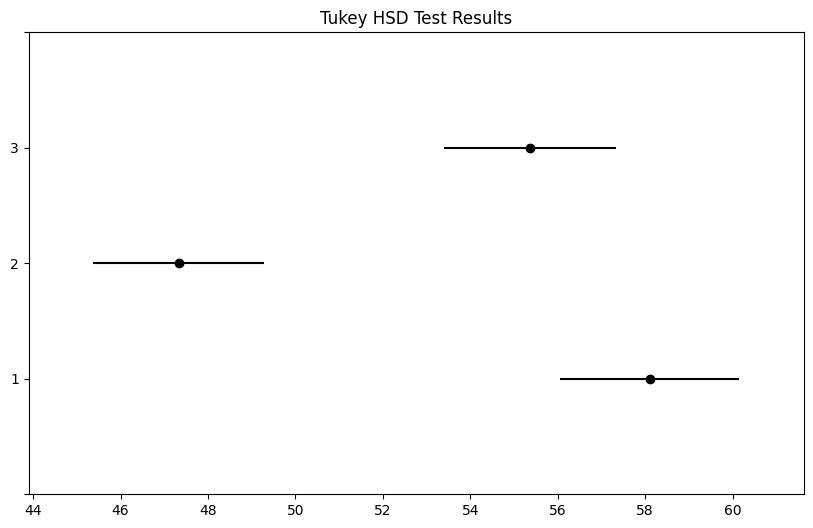

In [ ]:
tukey.plot_simultaneous()
plt.title("Tukey HSD Test Results")
plt.show()

In [ ]:
print(avg_sales_per_promo)

  Promotion  AvgWeeklySales
0         1       58.099012
1         2       47.329415
2         3       55.364468


**Interpretation of Tukey HSD Results**:

The Tukey HSD results provide pairwise comparisons of the mean weekly sales between the three promotions (1, 2, and 3). Here's the detailed interpretation:

1. **Promotion 1 vs. Promotion 2**:
   - **Mean Difference**: The average weekly sales for Promotion 1 are **10.77 higher** than Promotion 2.
   - **p-adj (Adjusted p-value)**: `0.0`, indicating a **statistically significant difference** between the sales of Promotions 1 and 2.
   - **Confidence Interval**: The difference lies between `-14.77` and `-6.77`, which does not include 0, confirming significance.
   - **Reject**: `True`, indicating the null hypothesis (no difference in sales) is rejected.

2. **Promotion 1 vs. Promotion 3**:
   - **Mean Difference**: The average weekly sales for Promotion 1 are **2.73 higher** than Promotion 3.
   - **p-adj**: `0.2444`, which is **not statistically significant**.
   - **Confidence Interval**: The range is `-6.74` to `1.27`, which includes 0, meaning the observed difference might be due to chance.
   - **Reject**: `False`, so we fail to reject the null hypothesis (no significant difference).

3. **Promotion 2 vs. Promotion 3**:
   - **Mean Difference**: The average weekly sales for Promotion 3 are **8.04 higher** than Promotion 2.
   - **p-adj**: `0.0`, indicating a **statistically significant difference**.
   - **Confidence Interval**: The difference lies between `4.12` and `11.95`, which does not include 0, confirming significance.
   - **Reject**: `True`, indicating the null hypothesis is rejected.

---

**Real Data Context**:

| Promotion | AvgWeeklySales |
|-----------|----------------|
| 1         | 58.10          |
| 2         | 47.33          |
| 3         | 55.36          |

- **Promotion 1 vs. 2**: The difference in average weekly sales is significant, confirming that **Promotion 1** performs significantly better than **Promotion 2**.
- **Promotion 1 vs. 3**: There is no statistically significant difference between **Promotion 1** and **Promotion 3**.
- **Promotion 2 vs. 3**: The difference in average weekly sales is significant, confirming that **Promotion 3** performs significantly better than **Promotion 2**.

---

**Interpretation with Caution:**

The results should be interpreted with caution, particularly for Campaign 2. While the Kruskal-Wallis and Tukey HSD tests indicate significant differences in sales between promotions, the underrepresentation of Campaign 2 could skew the results, limiting the generalizability of these findings. Further experimentation with an adequate sample size for Campaign 2 is recommended to confirm these conclusions.

# **Conclusion**:

- **Best Performing Promotions**: Promotions **1** and **3** perform better in terms of average weekly sales.
- **Worst Performing Promotion**: Promotion **2** has significantly lower sales than the other two.
- **Recommendation**: Choose **Promotion 1** or **Promotion 3**, as there is no significant difference between these two. Further analysis may include cost-effectiveness or qualitative feedback to make the final decision.